Dataset No. of Rows:  1599
Dataset No. of Columns:  12
Dataset first few rows:
 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
Dataset info:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sug

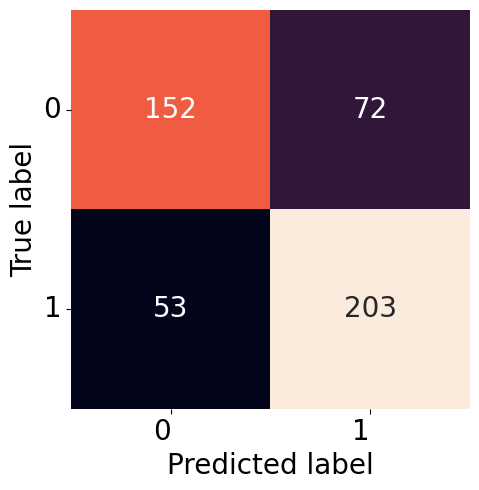

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#%%-----------------------------------------------------------------------
#importing Dataset

# read data as panda dataframe
wine_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

# printing the dataset shape
print("Dataset No. of Rows: ", wine_data.shape[0])
print("Dataset No. of Columns: ", wine_data.shape[1])

# printing the dataset observations
print("Dataset first few rows:\n ")
print(wine_data.head(2))

# printing the struture of the dataset
print("Dataset info:\n ")
print(wine_data.info())

# printing the summary statistics of the dataset
print(wine_data.describe(include='all'))

#%%-----------------------------------------------------------------------
# data preprocessing
# convert multi-class label to binary
wine_data['quality'] = wine_data['quality'].apply(lambda x:0 if x<=5 else 1)

#%%-----------------------------------------------------------------------
# split the dataset
# separate the target variable
X = wine_data.values[:, :-1]
Y = wine_data.values[:, -1]

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#%%-----------------------------------------------------------------------
# perform training
# creating the classifier object
clf = LogisticRegression()

# performing training
clf.fit(X_train, y_train)

#%%-----------------------------------------------------------------------
# make predictions
# predicton on test
y_pred = clf.predict(X_test)

y_pred_score = clf.predict_proba(X_test)

#%%-----------------------------------------------------------------------
# calculate metrics
print("\n")

print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")


print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")

print("ROC_AUC : ", roc_auc_score(y_test,y_pred_score[:,1]) * 100)
print("\n")

# %%-----------------------------------------------------------------------
# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = wine_data['quality'].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()